## Goals: Spliting between test and train dataset

Split the baseline dataset into a train, and 2 test dataset with a spatial and a spatio-temporal split.


# 1. Data Import and Setup

Imports necessary libraries, sets up environment paths.


In [ ]:
import sys
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(BASE_DIR)

from src.utils.model import split_dataset
from src.utils.plots import plot_water_flows

Defines constants :

- INPUT_DIR must be the same as the one defined in _00 Preprocessing/Feature Engineering_.


In [ ]:
SEED = 42

SPLIT_TIME = "2000-01-01"

TEST_STATIONS = [
    6119020,  # France
    6124510,  # France
    6139261,  # France
    6139640,  # France
    6139900,  # France
    6139825,  # France
    56610000,  # Brazil
    56920000,  # Brazil
]

INPUT_DIR = "../../../../data/input/"

In [ ]:
ds_baseline = pd.read_csv(f"{INPUT_DIR}dataset_baseline.csv")
ds_baseline = ds_baseline.set_index("ObsDate")

# 2. Data Splitting, Saving, and Visualization

Splits the dataset into training, test, and temporal-test sets using the specified configuration.
Here we are reproducing the kind of split used on evaluation (there is both a spatial split and a spatio-temporal split).

For reference the evaluation dataset is created as follow :

<img src="../../images/eval.png" alt="Experiment Diagram" style="width:50%;" />

Here we are subdivision the training data as follow :

<img src="../../images/eval_explo.png" alt="Experiment Diagram" style="width:50%;" />


In [ ]:
ds_train, ds_test_spatio_temporal, ds_test_temporal = split_dataset(
    ds_baseline, time=SPLIT_TIME, seed=SEED, test_stations=TEST_STATIONS
)

Saves the complete baseline, training, and test datasets to CSV files for future use.


In [7]:
# save the dataset
ds_train.to_csv(f"{INPUT_DIR}ds_train.csv")
ds_test_spatio_temporal.to_csv(f"{INPUT_DIR}ds_test_spatio_temporal.csv")
ds_test_temporal.to_csv(f"{INPUT_DIR}ds_test_temporal.csv")

Visualizes the water flow for selected stations in the training and test sets.


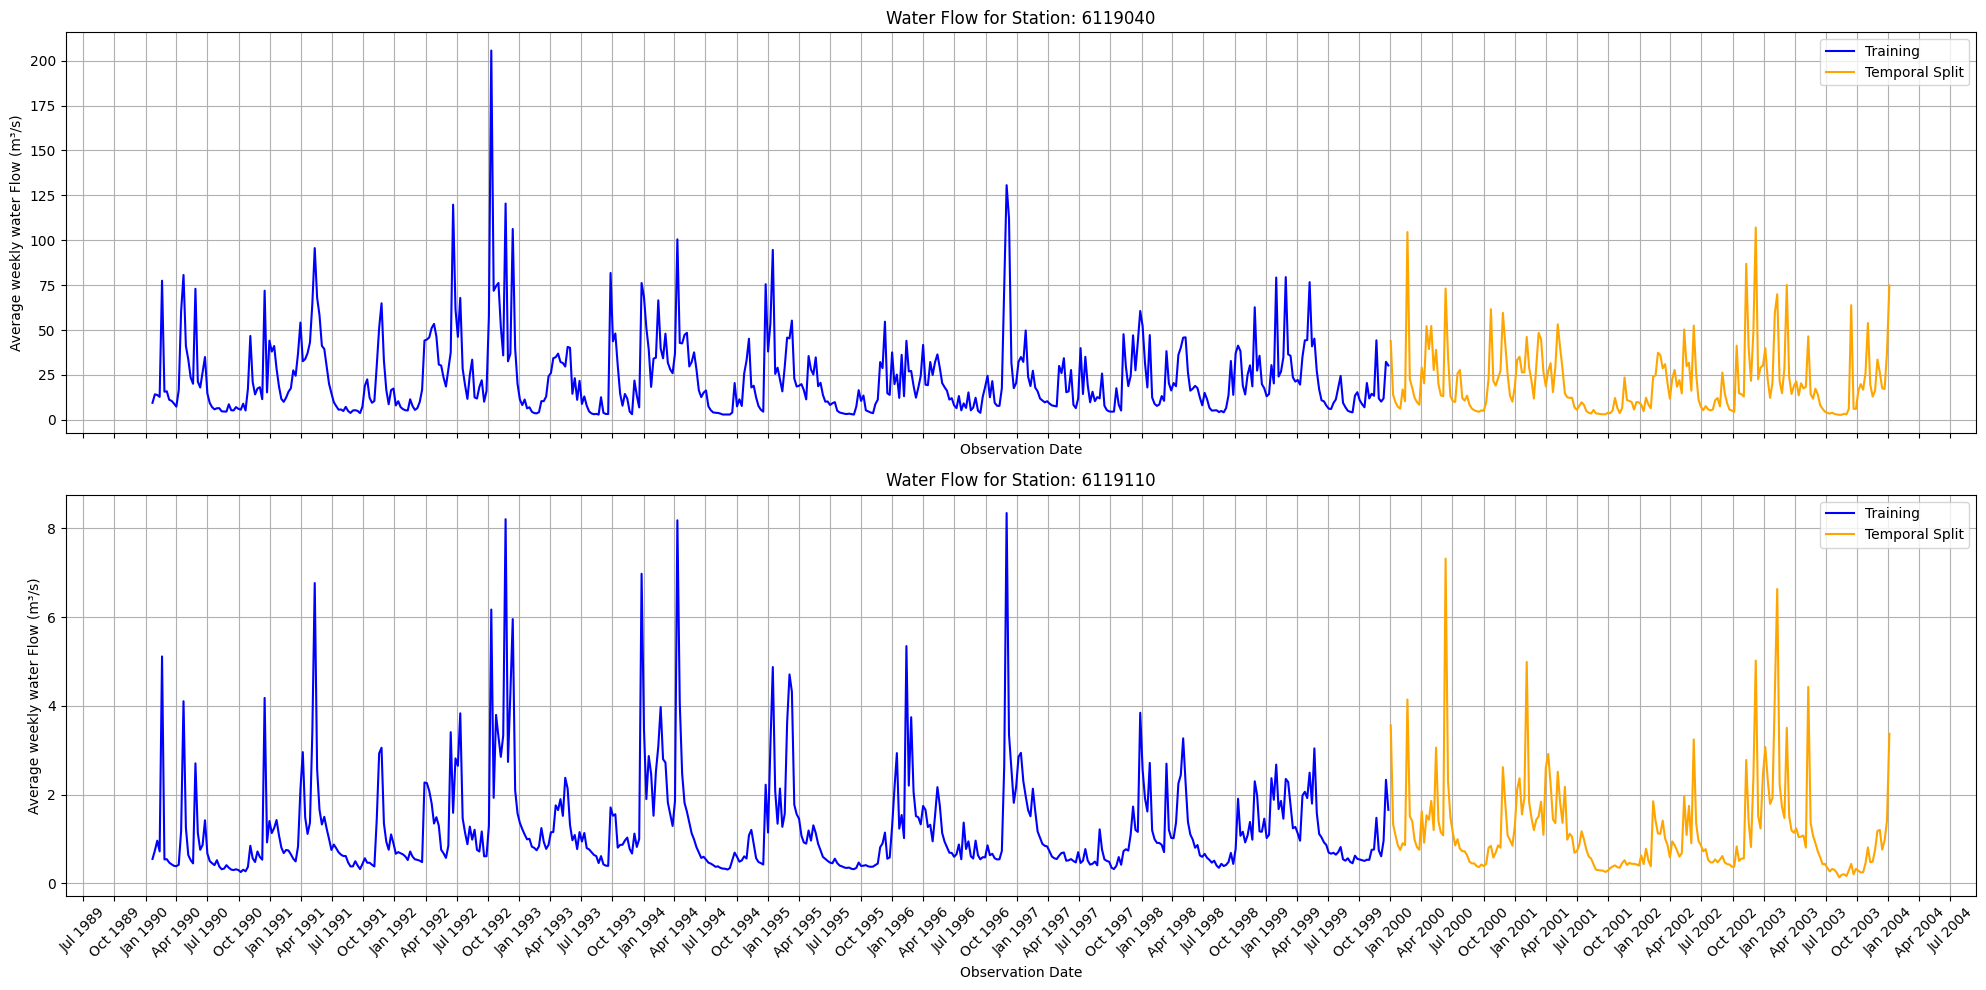

In [ ]:
plot_water_flows(ds_train, ds_test_temporal, display=True, save=False, max_stations=2)